In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## J(λ)=reproj_err+λ⋅gcp_err

In [10]:

data = pd.read_csv("ba_per_obs_errors_jax.csv")

# 2) compute GSD (meters/pixel)
sensor_width_mm = 13.2   # replace with your sensor width
f_mm = 10.57   # from metadata
H = 513           # approximate camera altitude (tz) — adapt as needed
image_width_px = 5472

GSD = (H * sensor_width_mm) / (f_mm * image_width_px)
reproj_err=data['err_px']* GSD
reproj_err = np.array(reproj_err)# shape (3521,)
data = [-1.36085386, -6.68653645,  3.22849425, -1.36085386, -6.68653645,  3.22849425,
 -1.36085386, -6.68653645,  3.22849425, -1.36085386, -6.68653645,  3.22849425,
 -1.36085386, -6.68653645,  3.22849425, -1.36085386, -6.68653645,  3.22849425,
 -1.36085386, -6.68653645,  3.22849425, -1.261648,   -6.25943835,  3.28812181,
 -1.261648,   -6.25943835,  3.28812181, -1.261648,   -6.25943835,  3.28812181,
 -1.261648,   -6.25943835,  3.28812181, -1.261648,   -6.25943835,  3.28812181,
 -1.261648,   -6.25943835,  3.28812181, -1.261648,   -6.25943835,  3.28812181,
 -0.88942644, -6.56570041,  3.0245223,  -0.88942644, -6.56570041,  3.0245223,
 -0.88942644, -6.56570041,  3.0245223,  -0.88942644, -6.56570041,  3.0245223,
 -0.88942644, -6.56570041,  3.0245223,  -0.88942644, -6.56570041,  3.0245223,
 -0.88942644, -6.56570041,  3.0245223,  -0.50515857, -6.47811013,  2.85547738,
 -0.50515857, -6.47811013,  2.85547738, -0.50515857, -6.47811013,  2.85547738,
 -0.50515857, -6.47811013,  2.85547738, -0.50515857, -6.47811013,  2.85547738,
 -0.50515857, -6.47811013,  2.85547738, -0.50515857, -6.47811013,  2.85547738,
 -0.60950275, -6.86274701,  2.80925011, -0.60950275, -6.86274701,  2.80925011,
 -0.60950275, -6.86274701,  2.80925011, -0.60950275, -6.86274701,  2.80925011,
 -0.60950275, -6.86274701,  2.80925011, -0.60950275, -6.86274701,  2.80925011,
 -0.60950275, -6.86274701,  2.80925011]

arr = np.array(data).reshape(35, 3)
gcp_err = np.array([
 [1.94078405, -0.89961813,  1.8972],
 [1.94078405, -0.89961813,  1.8972],
 [1.94078405, -0.89961813,  1.8972],
 [1.94078405, -0.89961813,  1.8972],
 [1.94078405, -0.89961813,  1.8972],
 [1.94078405, -0.89961813,  1.8972],
 [1.94078405, -0.89961813,  1.8972],
 
 [1.78853169, -0.74733573, -0.0378],
 [1.78853169, -0.74733573, -0.0378],
 [1.78853169, -0.74733573, -0.0378],
 [1.78853169, -0.74733573, -0.0378],
 [1.78853169, -0.74733573, -0.0378],
 [1.78853169, -0.74733573, -0.0378],
 [1.78853169, -0.74733573, -0.0378],
 
 [1.22802435,  2.29592705, -0.3188],
 [1.22802435,  2.29592705, -0.3188],
 [1.22802435,  2.29592705, -0.3188],
 [1.22802435,  2.29592705, -0.3188],
 [1.22802435,  2.29592705, -0.3188],
 [1.22802435,  2.29592705, -0.3188],
 [1.22802435,  2.29592705, -0.3188],
 
 [-0.44095188,  1.16292176, -1.6288],
 [-0.44095188,  1.16292176, -1.6288],
 [-0.44095188,  1.16292176, -1.6288],
 [-0.44095188,  1.16292176, -1.6288],
 [-0.44095188,  1.16292176, -1.6288],
 [-0.44095188,  1.16292176, -1.6288],
 [-0.44095188,  1.16292176, -1.6288],
 
 [-4.51638821, -1.81189495,  0.0882],
 [-4.51638821, -1.81189495,  0.0882],
 [-4.51638821, -1.81189495,  0.0882],
 [-4.51638821, -1.81189495,  0.0882],
 [-4.51638821, -1.81189495,  0.0882],
 [-4.51638821, -1.81189495,  0.0882],
 [-4.51638821, -1.81189495,  0.0882],
])
        # shape (176,)
gcp_err=(arr+gcp_err)/2
# Compute mean squared errors
mse_reproj = np.mean(reproj_err ** 2)
mse_gcp = np.mean(np.sum(np.square(gcp_err), axis=1))#np.mean(gcp_err ** 2)


In [11]:
len(gcp_err)

35

## GSD: Ground Sampling Distance

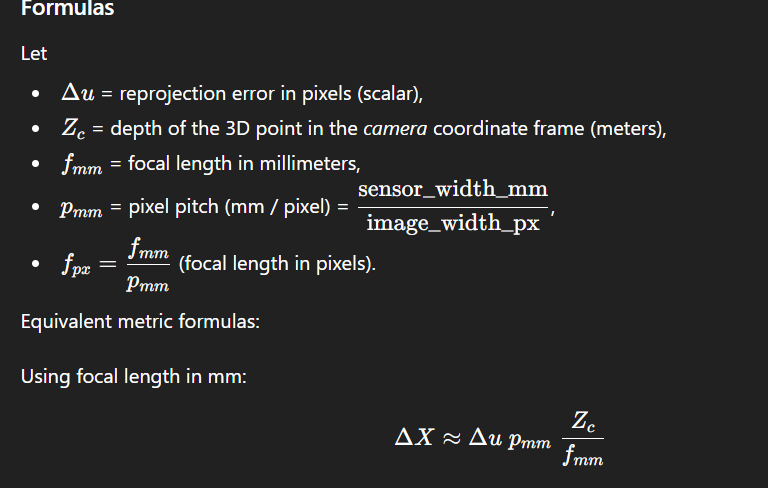

In [12]:
def combined_cost(lambda_val, reproj_err, gcp_err):
    mse_reproj = np.mean(reproj_err ** 2)
    mse_gcp = np.mean(gcp_err ** 2)
    # Normalize both errors for balanced scaling
    return mse_reproj  + lambda_val * (mse_gcp )


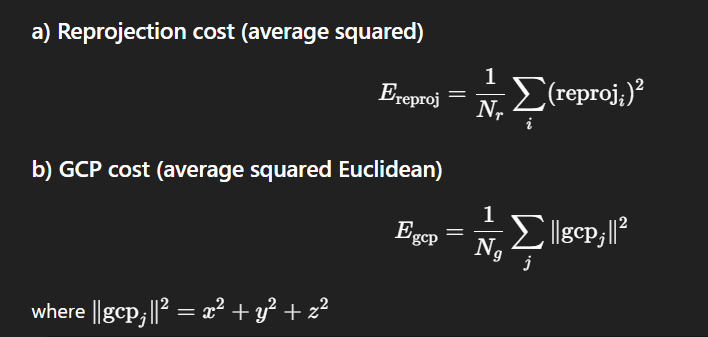

In [13]:
def fibonacci_search(func, low, high, n_iter, reproj_err, gcp_err):
    # Generate Fibonacci sequence up to n_iter
    fib = [0, 1]
    for i in range(2, n_iter + 1):
        fib.append(fib[-1] + fib[-2])
    
    # Initialize internal points
    x1 = low + (fib[-3] / fib[-1]) * (high - low)
    x2 = low + (fib[-2] / fib[-1]) * (high - low)

    f1 = func(x1, reproj_err, gcp_err)
    f2 = func(x2, reproj_err, gcp_err)

    for i in range(n_iter - 2):
        if f1 > f2:
            low = x1
            x1 = x2
            f1 = f2
            x2 = low + (fib[-i - 3] / fib[-i - 1]) * (high - low)
            f2 = func(x2, reproj_err, gcp_err)
        else:
            high = x2
            x2 = x1
            f2 = f1
            x1 = low + (fib[-i - 4] / fib[-i - 1]) * (high - low)
            f1 = func(x1, reproj_err, gcp_err)
        print(f"Iter:{i+1} | Interval:[{x1},{x2}]")
    best_lambda = (low + high) / 2
    best_cost = func(best_lambda, reproj_err, gcp_err)
    return best_lambda, best_cost


In [14]:
mse_reproj = np.mean(reproj_err ** 2)
mse_gcp = np.mean(gcp_err ** 2)

lambda_scale = mse_reproj / (mse_gcp + 1e-9)
low = max(1e-9, lambda_scale / 100.0)
high = min(1e9, lambda_scale * 100.0)

print("Search range:", low, "to", high)


Search range: 0.0004485020267464255 to 4.485020267464255


In [15]:
best_lambda, best_cost = fibonacci_search(
    combined_cost, low, high, n_iter=20,
    reproj_err=reproj_err,
    gcp_err=gcp_err
)

print(f"Optimal λ = {best_lambda:.6f}")
print(f"Minimum combined cost = {best_cost:.6f} m")


Iter:1 | Interval:[0.6547387693294171,1.7134024476129281]
Iter:2 | Interval:[0.4048219878659144,0.6547387693294171]
Iter:3 | Interval:[0.15490556977234593,0.4048219878659144]
Iter:4 | Interval:[0.09590799116974351,0.15490556977234593]
Iter:5 | Interval:[0.03691101143376232,0.09590799116974351]
Iter:6 | Interval:[0.022983201103126065,0.03691101143376232]
Iter:7 | Interval:[0.009056362337686518,0.022983201103126065]
Iter:8 | Interval:[0.0057678515941321775,0.009056362337686518]
Iter:9 | Interval:[0.002480913489051725,0.0057678515941321775]
Iter:10 | Interval:[0.001703629452758794,0.002480913489051725]
Iter:11 | Interval:[0.0009288901905640417,0.001703629452758794]
Iter:12 | Interval:[0.0007438261269846298,0.0009288901905640417]
Iter:13 | Interval:[0.0005628801609887151,0.0007438261269846298]
Iter:14 | Interval:[0.0005166537421860111,0.0005628801609887151]
Iter:15 | Interval:[0.0004770965603069979,0.0005166537421860111]
Iter:16 | Interval:[0.0004621323698343426,0.0004770965603069979]
Iter

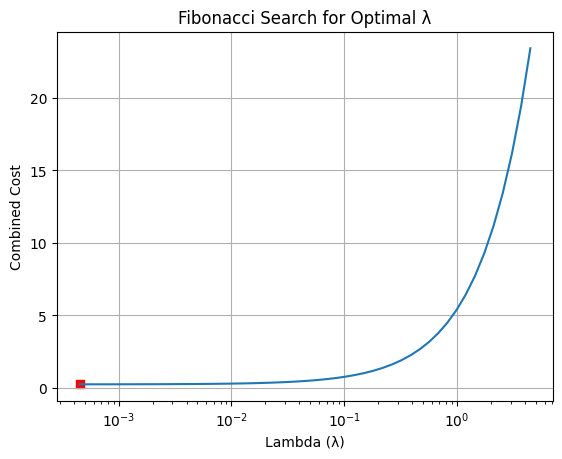

In [16]:
lambdas = np.logspace(np.log10(low), np.log10(high), 50)
costs = [combined_cost(l, reproj_err, gcp_err) for l in lambdas]

plt.semilogx(lambdas, costs)
plt.xlabel("Lambda (λ)")
plt.ylabel("Combined Cost")
plt.scatter(best_lambda,best_cost,marker='s',c='red')
plt.title("Fibonacci Search for Optimal λ")
plt.grid(True)
plt.show()
